In [3]:
! pip install tweepy 


In [4]:
import tweepy
import numpy as np
import csv
import pandas as pd
with open('scraped_tweets.csv','r',encoding="utf-8")as file:
    reader=csv.reader(file)
    list_hashtags=[]
    c=0
    for row in reader :
       if(c!=0):
           for elements in row:
               list_hashtags.append(elements)
       c+=1
extracted_ht=np.array(list_hashtags)
print(extracted_ht.shape)
unique_hst=np.unique(extracted_ht)
print(unique_hst.shape)

(29502,)
(2017,)


In [5]:

            
l={}
c=0
for i in extracted_ht:
    i=i.lower()
    if i in l:
        l[i]+=1
    else:
        l[i]=1
x_axis_values=[]
y_axis_values=[]
for key in l.keys():
    if(l[key]>=10):
        print(key)
        x_axis_values.append(key)
        y_axis_values.append(l[key])
        
#print(l)

print(x_axis_values)


oxygen
icu
oxygencylinder
delhincr
covid
verified
oxygencylinders
gurgaon
sos
remdisivir
agra
covidemergency
india
covid19
covid_19
oxygencrisis
oxygenshortage
lockdown
noida
covidindiainfo
delhi
hospital
odisha
remdesivir
vaccine
jammu
kashmir
bed
kolkata
lucknow
beds
indiafightscorona
indianeedsoxygen
gkwebtv
pune
important
pmmodi
pm
indias_helping_youth
ihyfamily
oxygenrefilling
covid19india
covidhelp
icubeds
covid19indiahelp
covidresources
corona
covidindia
surat
indore
covidsos
congress
cowin
urgent
oxygenrefill
requirement
cn103
rohini
delhineedsoxygen
delhifightscorona
remedisivir
cn099
need
oxygenbeds
sosdelhi
urgenthelp
needhelp
update
pandemic
health
nashik
coronaviruspandemic
coronavirus
government
vaccination
bjp
kanpur
yogiadityanath
warangalcantbreathe
emergency
updated
vikaspuri
coviddelhi
cn107
icubed
delhicovid
cn096
cylinder
ghaziabad
up
covidhelpdelhi
sosup
cn100
bangalore
karnatakafightscorona
sosbangalore
cn095
oxygenbed
required
karnataka
cn092
cn088
ventilatorbed

In [6]:
"""print("x_axis_values_Are-----------------------------------------\n")
print(x_axis_values)
print('\n')"""
print("y_axis_values_Are------------------------------------------\n")
print(y_axis_values)
print('\n')

y_axis_values_Are------------------------------------------

[7421, 176, 224, 31, 2664, 1382, 824, 28, 82, 31, 85, 89, 358, 592, 22, 102, 850, 175, 69, 39, 734, 441, 18, 171, 53, 13, 21, 124, 97, 86, 514, 36, 24, 14, 129, 19, 41, 37, 34, 34, 50, 165, 177, 21, 158, 159, 102, 152, 59, 63, 49, 11, 114, 335, 64, 72, 15, 16, 111, 137, 17, 25, 50, 76, 58, 134, 119, 39, 39, 24, 10, 13, 129, 18, 15, 22, 23, 82, 13, 125, 10, 49, 25, 20, 79, 83, 22, 27, 42, 44, 23, 22, 23, 178, 69, 47, 22, 75, 22, 48, 24, 19, 64, 19, 42, 11, 11, 24, 24, 24, 113, 25, 22, 22, 199, 32, 11, 42, 15, 42, 30, 34, 67, 114, 28, 49, 26, 29, 32, 22, 49, 49, 49, 49, 49, 49, 49, 50, 50, 30, 10, 16, 13, 11, 13, 16, 12, 36, 11, 87, 11, 11, 14, 11, 45, 11, 44, 14, 95, 30, 67, 11, 10, 14, 19, 11, 11, 11, 11, 14, 82, 12, 13, 15, 29, 10, 78, 195, 31, 31, 37, 10, 45, 15, 25, 49, 38, 36, 50, 22, 10, 24, 16, 10, 14, 22, 22, 55, 15, 27, 33, 29, 17, 15, 11, 11, 11, 15, 29, 29, 12, 33, 18, 18, 17, 11, 18, 34, 23, 15, 28, 23, 26, 23, 24,

In [10]:
freq=list(y_axis_values)
# freq=[4,2,3,6]


P=[]
P.append(0)
PP=[]
PP.append(0)
i=1
while i <= len(freq):

        P.insert( i,P[i - 1] + freq[i-1])
        PP.insert( i,PP[i - 1] + freq[i-1]*freq[i-1])
        i+=1


def SqError(a, b):  ## a and b are the starting and ending indexes of the range taken
        s2 = PP[b] - PP[a-1]
        s1 = P[b] - P[a-1]
        err=(s2 - (s1 * s1 / (b - a + 1)))
        return err



def optimal_histogram(B,BestErr,index):
    k = 1
    BestErr=[[-1 for i in range(len(freq)+1)]for j in range(B+1)]
    index=[-1 for i in range(len(freq)+1)]
    while k <= B:
        if k == 1:  ### direct calculation of squared error when single bucket
            i = 1
            while i <= len(freq):
                BestErr[k][i] = SqError(1, i)
                i += 1

        else:
            i = 1
            while i <= len(freq):
                # BestErr[k][i] = Decimal('Infinity')
                BestErr[k][i] = 9999999

                ## finding the minm error of k-1the bucket
                j = k-1
                while j <= i - 1:
                    if BestErr[k - 1][j] + SqError(j+1, i ) < BestErr[k][i]:
                        BestErr[k][i] = BestErr[k - 1][j] + SqError(j+1, i )
                        index[i] = j + 1
                    j += 1
                i += 1


        k += 1
    return BestErr,index
##doing it right now
# B=100
# BestErr,index=optimal_histogram(B,BestErr=[],index=[])



In [11]:
print(sum(freq))

26656


In [17]:

# B=190 #optimized
B=220 
BestErr,index=optimal_histogram(B,BestErr=[],index=[])
print("interval points for histogram\n")
i=B
j=len(freq)
while(i>=2):
    end_point=j
    j=index[j]
    print("[" , j , " .. " , end_point , "]")
    i-=1
    j-=1
print("[" , 1 , " .. " , j , "]")
print("index",index)
print("error",BestErr)

interval points for histogram

[ 263  ..  269 ]
[ 260  ..  262 ]
[ 259  ..  259 ]
[ 257  ..  258 ]
[ 256  ..  256 ]
[ 255  ..  255 ]
[ 254  ..  254 ]
[ 253  ..  253 ]
[ 250  ..  252 ]
[ 249  ..  249 ]
[ 248  ..  248 ]
[ 247  ..  247 ]
[ 245  ..  246 ]
[ 244  ..  244 ]
[ 243  ..  243 ]
[ 242  ..  242 ]
[ 241  ..  241 ]
[ 240  ..  240 ]
[ 239  ..  239 ]
[ 237  ..  238 ]
[ 236  ..  236 ]
[ 235  ..  235 ]
[ 234  ..  234 ]
[ 233  ..  233 ]
[ 232  ..  232 ]
[ 231  ..  231 ]
[ 230  ..  230 ]
[ 229  ..  229 ]
[ 228  ..  228 ]
[ 227  ..  227 ]
[ 226  ..  226 ]
[ 225  ..  225 ]
[ 224  ..  224 ]
[ 223  ..  223 ]
[ 222  ..  222 ]
[ 221  ..  221 ]
[ 220  ..  220 ]
[ 219  ..  219 ]
[ 218  ..  218 ]
[ 217  ..  217 ]
[ 216  ..  216 ]
[ 215  ..  215 ]
[ 214  ..  214 ]
[ 213  ..  213 ]
[ 212  ..  212 ]
[ 211  ..  211 ]
[ 210  ..  210 ]
[ 209  ..  209 ]
[ 208  ..  208 ]
[ 207  ..  207 ]
[ 206  ..  206 ]
[ 205  ..  205 ]
[ 204  ..  204 ]
[ 203  ..  203 ]
[ 202  ..  202 ]
[ 201  ..  201 ]
[ 200  ..  200 ]


In [34]:
B=220
i=B
j=len(freq)
bucket_f=list()

def calculate_bucket_frequency(start,end):
    f=0
    if start!=end:
        for i in range(start,end):
            f+=freq[i]
        f=f/(end-start+1)    
    else:
        f=freq[start]
    bucket_f.append(f)
       
        
    
bucket_range=[]
while(i>=2):
    end_point=j
    j=index[j]
    calculate_bucket_frequency(j, end_point)
    bucket_range.append(j)
    i-=1
    j-=1
calculate_bucket_frequency(1,j)
bucket_range.append(j)

print(np.flip(np.array(bucket_f)))
print(np.flip(np.array(bucket_range)))


[279.94594595  34.          34.          50.         165.
 177.          21.         158.         159.         102.
 152.          59.          63.          49.          11.
 114.         335.          64.          72.          15.
  16.         111.         137.          17.          25.
  50.          76.          58.         134.         119.
  39.          39.          24.          10.          13.
 129.          18.          15.          22.          23.
  82.          13.         125.          10.          49.
  25.          20.          79.          83.          22.
  27.          42.          44.          23.          22.
  23.         178.          69.          47.          22.
  75.          22.          48.          24.          19.
  64.          19.          42.          11.          11.
  24.          24.          24.         113.          25.
  22.          22.         199.          32.          11.
  42.          15.          42.          30.          34.
  67.         

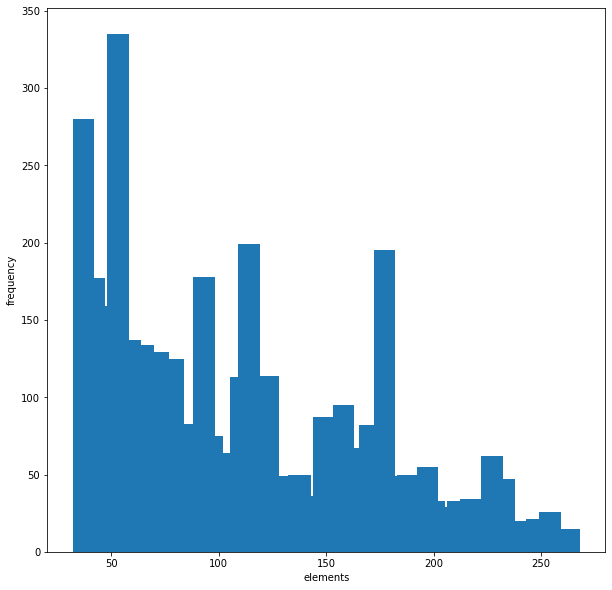

In [35]:
import matplotlib.pyplot as plt
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.bar(bucket_range,bucket_f,width=10)
plt.xlabel('elements')
plt.ylabel('frequency')
plt.show()

In [22]:
x_axis_values[0]

'oxygen'